### 0506 Crowling
- 제목 / 본문/ 링크 크롤링
  - https://wonhwa.tistory.com/10?category=996518
- 셀레니움 코랩 설치
  - https://pgh268400.tistory.com/286 
- 파이썬 워드 클라우드
  - https://doitgrow.com/34 
- konply 코랩 설치
  - https://pinggoopark.tistory.com/107 
- 크롬드라이버 설치
  - https://dhznsdl.tistory.com/21
- 코랩 한글 사용
  - https://durian9s-coding-tree.tistory.com/19 
- 형태소 등 추출
  - https://wikidocs.net/21707 
- 코랩 한글 폰트 불러오기 문제 해결
  - https://blog.naver.com/PostView.nhn?blogId=dsz08082&logNo=222021179448&redirect=Dlog&widgetTypeCall=true&directAccess=false 

In [13]:
# 셀레니움 설치
# 이 부분은 런타임 시간 동안 한번만 실행하면 됌
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [14]:
# konlpy 설치
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

In [15]:
# JAVA_HOME 환경변수 설정하기
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [16]:
# 코랩용 한글 폰트 사용 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155903 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [17]:
import os
import sys
import urllib.request
import json
import re
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import numpy as np
from   selenium import webdriver
from   bs4 import BeautifulSoup
from   wordcloud import WordCloud
from   collections import Counter
from   konlpy.tag import Okt
from   PIL import Image
from   matplotlib import font_manager

In [35]:
# 단어 빈도수 매칭 리스트
wordList = ['시트러스', '오렌지', '레몬', '라임', '귤', '유자', '캐러멜', '초콜릿', '커피', '호피', 'IPA', '꽃', '홉', 'IBU', '에일', '라거', '청량감', '페일', '붉은색', '과일', '비터', '몰티', '엔젤링', '바이젠', '상큼', '드래프트', '드라이', '드링커블', '바디', '자몽', '감귤', '탄산', '카보', '파이니', '송진', '세션', '밀', '필스너', '흑맥주', '페일', '에일', '묵직', '상쾌', '중성', '자극', '벌꿀', '꿀', '부드러움', '시큼', '몰트', '풍미', '와일드', '밍밍', '추천', '비추', '오비', '새콤', '무난', '산뜻', '향긋', '순한', '주스', '달달', '과실주', '최고', '음료수', '라즈베리', '최고', '음료수', '쥬스', '베리', '비타민', '강추']

In [52]:
# 코랩에서 나눔 글씨체 사용하기
# fontpath를 주의할 것

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.


위는 한 번만 실행  
아래는 검색어 바뀔 때마다 실행

In [58]:
# 크롤링 시작
client_id = "ZLuPWwJ47OEWXSQAIlS4" # 발급받은 id 입력
client_secret = "BcmHs4QWvM" # 발급받은 secret 입력 
quote = input("검색어를 입력하세요: ") #검색어 입력받기
encText = urllib.parse.quote(quote)
display_num = input("크롤링할 수(100이하): ") #출력할 갯수 입력받기
url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display="+display_num# json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    #print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

body = response_body.decode('utf-8')
# 불필요한 ""(큰따옴표)지워주기
body = body.replace('"','')

#블로그 제목만 뽑기
titles = re.findall('title: (.*?),\nlink', body) #\n은 엔터의 의미
print('<<제목 모음>>')
print(titles)
print('총 제목 수: ',len(titles),'개')#제목갯수확인

#블로그 링크들 추출
links = re.findall('link: (.*?),\ndescription',body)
print('\n<<링크 모음>>')
print(links)
print('총 링크 수: ',len(links),'개')#링크갯수확인

# 링크를 다듬기 (필요없는 부분 제거 및 수정)
blog_links = []
for i in links:
    a = i.replace('\\','')
    b = a.replace('?Redirect=Log&logNo=','/')
    blog_links.append(b)

print(blog_links)
print('생성된 링크 갯수:',len(blog_links),'개')

검색어를 입력하세요: 트롤브루 리뷰
크롤링할 수(100이하): 20
<<제목 모음>>
['알쓰 추천! 논알콜 무알콜 맥주 7종 <b>리뷰</b> + <b>트롤브루</b>', '혼술 <b>리뷰</b> 두번째 [<b>트롤브루</b> 자몽]', '정새우:진짜새우, 써머스비, <b>트롤브루</b>, 에페스 <b>리뷰</b>', '[편의점 과일 맥주] 독일맥주 <b>트롤브루</b> 레몬 라들러 <b>리뷰</b>', '[알콜한모금]<b>트롤브루</b> 레몬 &amp; 자몽 #알쓰추천맥주', '편의점맥주<b>리뷰</b>_<b>트롤 브루</b> (TROLL BTREW)', '<b>트롤</b>맥주, <b>트롤브루</b> 맥주 레몬&amp;자몽 라들러 <b>리뷰</b> TROLL BREW', '[독일수입맥주] <b>트롤브루</b> 레몬 내돈내산 <b>리뷰</b>', '[<b>트롤브루</b>] <b>트롤브루</b> 아이스박스 기획세트 :: 자몽 &amp; 레몬... ', '이마트 트레이더스 <b>트롤브루</b> 자몽맥주 간단 후기', '편의점 4캔만원 과일맥주 <b>트롤브루</b> 자몽맥주', '(독일 맥주)<b>트롤브루</b> 자몽 맥주 <b>리뷰</b>', '<b>트롤브루</b> 자몽 맥주 <b>리뷰</b>', '혼술 혼맥 <b>트롤브루</b>자몽 완벽한 자몽 맥주 (Feat. 뻥이요골드)', '알쓰도 좋아할 독일맥주, <b>트롤브루</b> 레몬 라들러', '[<b>리뷰</b>] 편의점맥주 #01 <b>트롤브루</b> 자몽', '[편의점 과일 맥주] 독일맥주 <b>트롤브루</b> 자몽 라들러 <b>리뷰</b>', '[편의점 맥주<b>리뷰</b>2] <b>트롤브루</b> 자몽,  에델바이스 피치, 매그너스... ', '❤️CU맥주 <b>트롤브루</b> 자몽맛❤️', '이마트 트레이더스 <b>트롤브루</b> 레몬 맛있는 과일맥주 추천해요!']
총 제목 수:  20 개

<<링크 모음>>
['https:\\/\\/blog.naver.com\\/vivaceop16?Redirect=L

In [60]:
#코랩 드라이버 설치 및 설정
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

#본문 크롤링
#driver = webdriver.Chrome(os.path.abspath('chromedriver')) #또는 driver.exe 가있는 파일 위치 복사하여 입력
driver.implicitly_wait(3)

#블로그 링크 하나씩 불러서 크롤링
contents = []
for i in blog_links:
#블로그 링크 하나씩 불러오기
  driver.get(i)
  time.sleep(1)
  #블로그 안 본문이 있는 iframe에 접근하기
  driver.switch_to.frame("mainFrame")
#본문 내용 크롤링하기
  try:
    a = driver.find_element_by_css_selector('div.se-main-container').text
    contents.append(a)

  except:
    a = driver.find_element_by_css_selector('div#content-area').text
    contents.append(a)
  #print(본문: \n', a)

driver.quit() #창닫기
print("<<본문 크롤링이 완료되었습니다.>>")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead


<<본문 크롤링이 완료되었습니다.>>


In [54]:
# 제목, 블로그링크, 본문내용 Dataframe으로 만들기
# 굳이 실행 안 해도 됨 리뷰 크롤링 내용 간단 요약을 보기 위해 작성
import pandas as pd
df = pd.DataFrame({'제목':titles, '링크':blog_links,'내용':contents})
df

,제목,링크,내용
0,세계맥주<b>리뷰</b> <b>필스너 우르겔</b>,https://blog.naver.com/kyongbini/222103102611,필스너 우르겔\n필스너\n4.4\n물. 맥아. 홉. 이스트\n체코\n시원한 맛이...
1,"[내 마음대로 술집 <b>리뷰</b>] 종로 라도스트 - <b>필스너우르겔</b>,...",https://blog.naver.com/bullpenace/221101081642,ETC 12개의 글\n목록열기\n[내 마음대로 술집 리뷰] 종로 라도스트 - 필스너...
2,<b>필스너우르겔</b> 전용잔 세트 (Pilsner Urquell 머그전용잔),https://blog.naver.com/xclamp45/220752332013,제품리뷰 76개의 글\n목록열기\n제품리뷰\n필스너우르겔 전용잔 세트 (Pilsne...
3,수입맥주<b>리뷰</b> 체코맥주 <b>필스너우르겔</b>,https://blog.naver.com/eldorado-/221199832456,주류 5개의 글\n목록열기\n주류\n수입맥주리뷰 체코맥주 필스너우르겔\n로코모코 ・...
4,[체코] 프라하 맥주 즐기기 (코젤직영점/<b>필스너우르겔</b>펍...,https://blog.naver.com/bolam0120/221541559876,프라하에서 1일 3맥을 실천한 1인이 리뷰하는\n#코젤직영점 #코즐로브나 #필스너우...
5,<b>필스너우르겔</b> 아이스박스 패키지 겟하세요,https://blog.naver.com/kdhsndl/221529050697,안녕하세요\n저 오늘은 맥주 패키지 리뷰하려고요 ㅎㅎ\n짠\n수입맥주 편의점에가면 ...
6,[GS편의점]<b>필스너우르겔</b> 라거 캔맥주 <b>리뷰</b>,https://blog.naver.com/min_geun/221193691365,샀다 18개의 글\n목록열기\n샀다\n[GS편의점]필스너우르겔 라거 캔맥주 리뷰\n...
7,<b>필스너 우르겔</b>,https://blog.naver.com/chwndrh2/221163847145,(1)\n공지 서이추 관련\n2020. 6. 12.\nBeer 11개의 글\n목록열...
8,"<b>필스너 우르겔</b>과 함께하면 좋을 책이랄까,",https://blog.naver.com/readersu/220773116156,"(19)\n공지 블로그 대여, 같은 것 안 해요!\n2014. 2. 7.\n공지 움..."
9,안산술집 코젤다크하우스 고잔점 간단 <b>리뷰</b>,https://blog.naver.com/pioneeryang/222611251601,"코젤다크하우스 고잔점\n211224, 코젤다크•코젤다크시나몬•코젤필스너믹스•오지치즈..."


In [63]:
# 반복문 써서 contents 가져오면 시간 걸릴 거 같아서 아예 합침
contents_str = "".join(contents)

okt = Okt()
normal = okt.normalize(contents_str)
nouns = okt.nouns(normal) # 명사만 추출
words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

# words와 wordList의 대조
num = 0
newList = []
for i in range(len(wordList)):
    for j in range(len(words)):
        if wordList[i] == words[j]:
            newList.append(words[j])
print(newList)
wordC = Counter(newList)
print(wordC)

['오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '라임', '라임', '라임', '라임', '라임', '에일', '에일', '에일', '에일', '에일', '에일', '에일', '라거', '라거', '라거', '라거', '라거', '라거', '라거', '라거', '라거', '라거', '라거', '라거', '라거', '라거', '라거', '청량감', '청량감', '청량감', '청량감', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일',

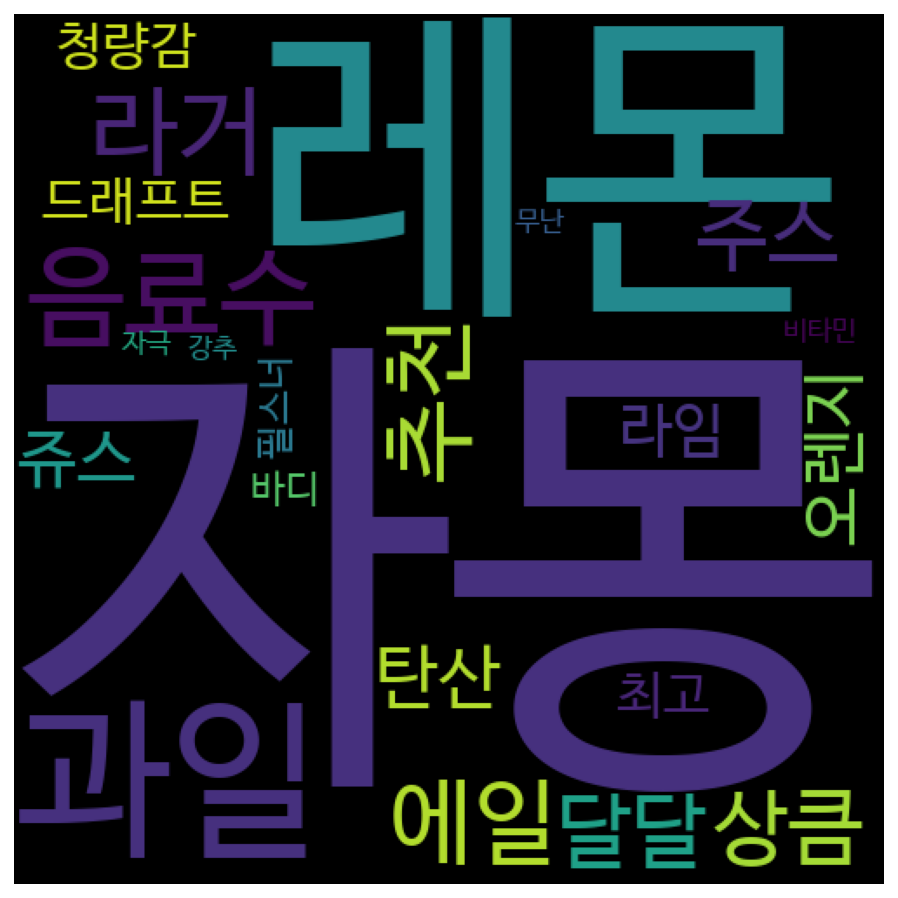

In [64]:
# 워드 클라우드 이미지 생성
wc = WordCloud(font_path='NanumBarunGothic', width=250, height=250, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(wordC)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(gen)

In [81]:
# png로 저장하고 싶은데 오류가ㅠㅠ
import cv2
cv2.imwrite('/content/drive/MyDrive/AI전공/WordCloud/호가든로제.png',gen)

TypeError: ignored